<a href="https://colab.research.google.com/github/aswinmkv/Python_Portfolio/blob/main/Aerofit_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("aerofit_treadmill.csv")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


### Structure and characteristic Feature of Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
df.shape

(180, 9)

In [ ]:
# no missing values in data
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
a=df['Product'].unique()
b=df["MaritalStatus"].unique()
print(a)
print(b)

['KP281' 'KP481' 'KP781']
['Single' 'Partnered']


from the above we can infer the following,

* product - 3 varities of product
* Age - ages range between 18 and 50, with average age 26
* Education - ranges between 12 to 21 years, with avg years of education 16
* marital Status - has 2 categories Single,Partnered
* Usage - avg useage of treadmill per week is 3
* income - avg income is $50596.5
* Miles - avg of 94miles distance covered in a week






### Non Graphical Analysis

In [ ]:
# Split of sales% based on the product level from the data
df["Product"].value_counts(normalize=True)*100

KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: Product, dtype: float64

In [ ]:
# Split of sales% based on the gender level from the data
df["Gender"].value_counts(normalize=True)*100

Male      57.777778
Female    42.222222
Name: Gender, dtype: float64

In [ ]:
# Split of sales% based on the gender level from the data
df["MaritalStatus"].value_counts(normalize=True)*100

Partnered    59.444444
Single       40.555556
Name: MaritalStatus, dtype: float64

In [ ]:
# sales based on gender and Product
df1=df.groupby(["Gender","Product"])["Age"].count().reset_index()
df1.rename(columns={"Age":"Count_sales"}).sort_values(by=["Count_sales"],ascending=False)

,Gender,Product,Count_sales
0,Female,KP281,40
3,Male,KP281,40
5,Male,KP781,33
4,Male,KP481,31
1,Female,KP481,29
2,Female,KP781,7


In [ ]:
# sales based on maritalstatus and Product
df2=df.groupby(["MaritalStatus","Product"])["Age"].count().reset_index()
df2.rename(columns={"Age":"Count_sales"}).sort_values(by=["Count_sales"],ascending=False)


,MaritalStatus,Product,Count_sales
0,Partnered,KP281,48
1,Partnered,KP481,36
3,Single,KP281,32
4,Single,KP481,24
2,Partnered,KP781,23
5,Single,KP781,17


In [ ]:
# avg income based on gender and Product
df3=df.groupby(["Gender","Product"])["Income"].mean().reset_index()
df3.rename(columns={"Income":"Avg_Income"}).sort_values(by=["Avg_Income"],ascending=False)

,Gender,Product,Avg_Income
5,Male,KP781,75825.030303
2,Female,KP781,73633.857143
1,Female,KP481,49336.448276
4,Male,KP481,48634.258065
3,Male,KP281,46815.975000
0,Female,KP281,46020.075000


In [ ]:
# avg income based on maritalstatus and Product
df4=df.groupby(["MaritalStatus","Product"])["Income"].mean().reset_index()
df4.rename(columns={"Income":"Avg_Income"}).sort_values(by=["Avg_Income"],ascending=False)

,MaritalStatus,Product,Avg_Income
2,Partnered,KP781,82047.173913
5,Single,KP781,66504.588235
1,Partnered,KP481,49522.666667
4,Single,KP481,48150.125000
0,Partnered,KP281,47848.750000
3,Single,KP281,44271.937500


In [ ]:
# avg usage based on gender and Product
df5=df.groupby(["Gender","Product"])["Usage"].mean().reset_index()
df5.rename(columns={"Usage":"Avg_Usage"}).sort_values(by=["Avg_Usage"],ascending=False)

,Gender,Product,Avg_Usage
2,Female,KP781,5.000000
5,Male,KP781,4.727273
3,Male,KP281,3.275000
1,Female,KP481,3.137931
4,Male,KP481,3.000000
0,Female,KP281,2.900000


In [ ]:
# avg usage based on marital Status and Product
df6=df.groupby(["MaritalStatus","Product"])["Usage"].mean().reset_index()
df6.rename(columns={"Usage":"Avg_Usage"}).sort_values(by=["Avg_Usage"],ascending=False)

,MaritalStatus,Product,Avg_Usage
2,Partnered,KP781,4.913043
5,Single,KP781,4.588235
3,Single,KP281,3.156250
4,Single,KP481,3.083333
1,Partnered,KP481,3.055556
0,Partnered,KP281,3.041667


In [ ]:
# influence of gender on marital status over the sale of the product
df7=df.groupby(["Gender","MaritalStatus","Product"])["Age"].count().reset_index()
df7.rename(columns={"Age":"Count_sales"}).sort_values(by=["Gender","Count_sales"],ascending=False)

,Gender,MaritalStatus,Product,Count_sales
6,Male,Partnered,KP281,21
7,Male,Partnered,KP481,21
8,Male,Partnered,KP781,19
9,Male,Single,KP281,19
11,Male,Single,KP781,14
10,Male,Single,KP481,10
0,Female,Partnered,KP281,27
1,Female,Partnered,KP481,15
4,Female,Single,KP481,14
3,Female,Single,KP281,13


########## Insights ###############

* Break up of sales based on product KP281(44.4%),KP481(33.3%),KP781(22.2%)
* Breakup of sales based on Gender level - Male(57.8%),Female(42.2%)
* Breakup of sales based on marital Status - Partnered(59.4%),single(40.6%)
* KP281 is the most preffered product in terms of both the gender
* KP281 is the most preffered product by partners
* KP781 is bought by individuals and partnered are of higher income bracket
* Females and partners usage is the most with the product KP781
* Among the partners - male influenced to buy 62 treadmillsoverall,females influenced to buy 46 treadmills overall


### Graphical Analysis

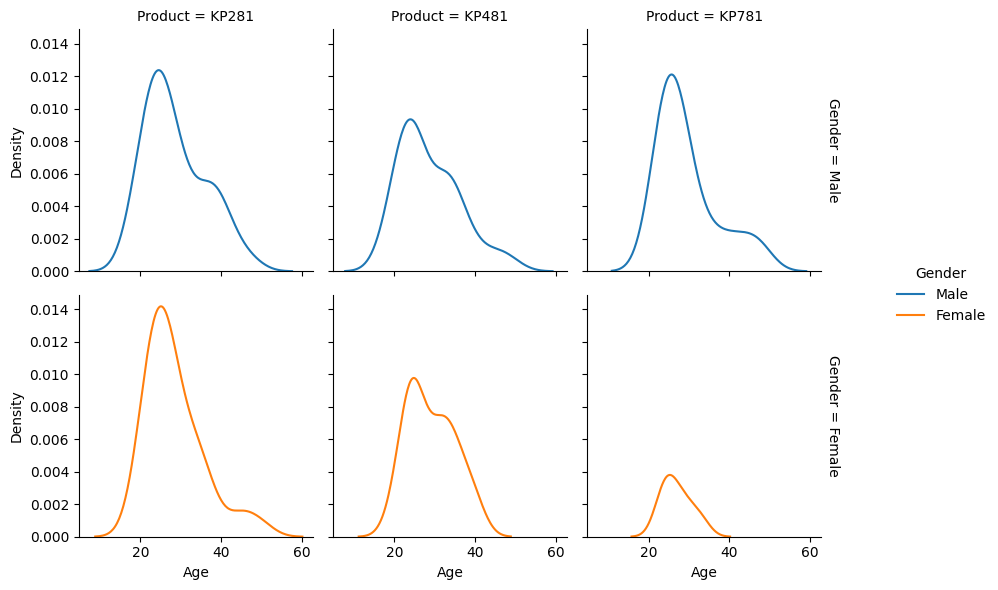

In [ ]:
#Age vs Product Vs Gender
sns.displot(data=df,x="Age",col="Product",row="Gender",hue="Gender",height=3,kind="kde",facet_kws=dict(margin_titles=True))

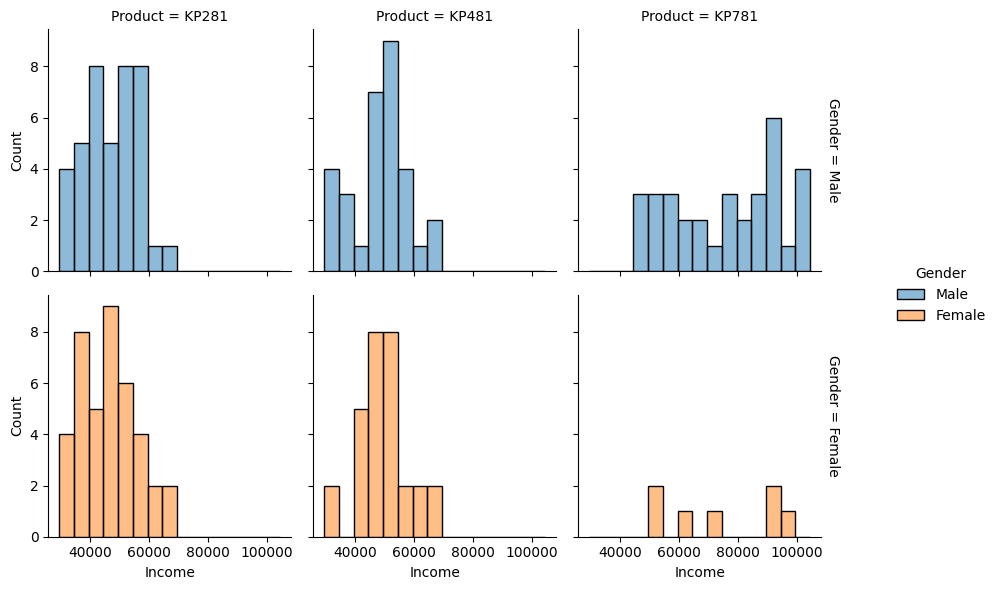

In [ ]:
#Income vs Product Vs Gender
sns.displot(data=df,x="Income",col="Product",row="Gender",hue="Gender",height=3,kind="hist",facet_kws=dict(margin_titles=True))

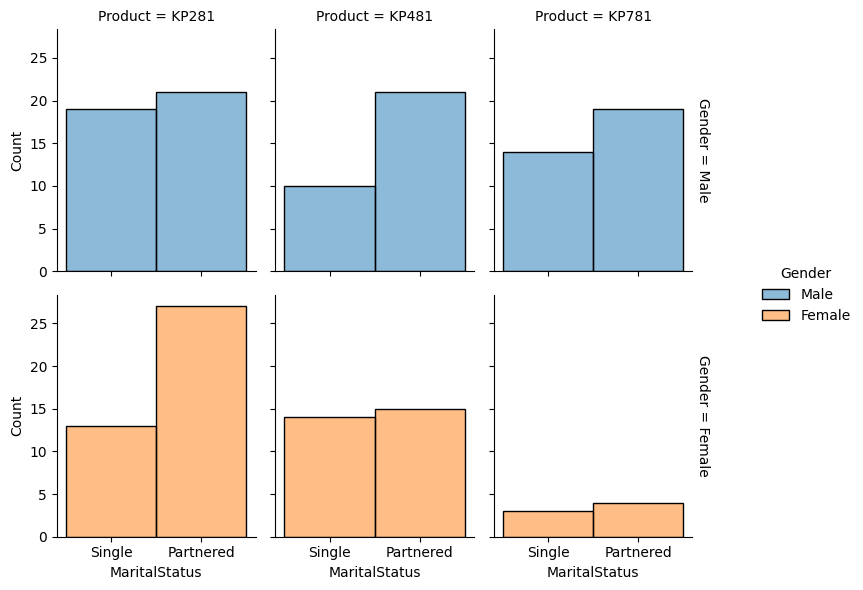

In [ ]:
#Maritalstatus vs Product Vs Gender
sns.displot(data=df,x="MaritalStatus",col="Product",row="Gender",hue="Gender",height=3,kind="hist",facet_kws=dict(margin_titles=True),aspect=0.85)

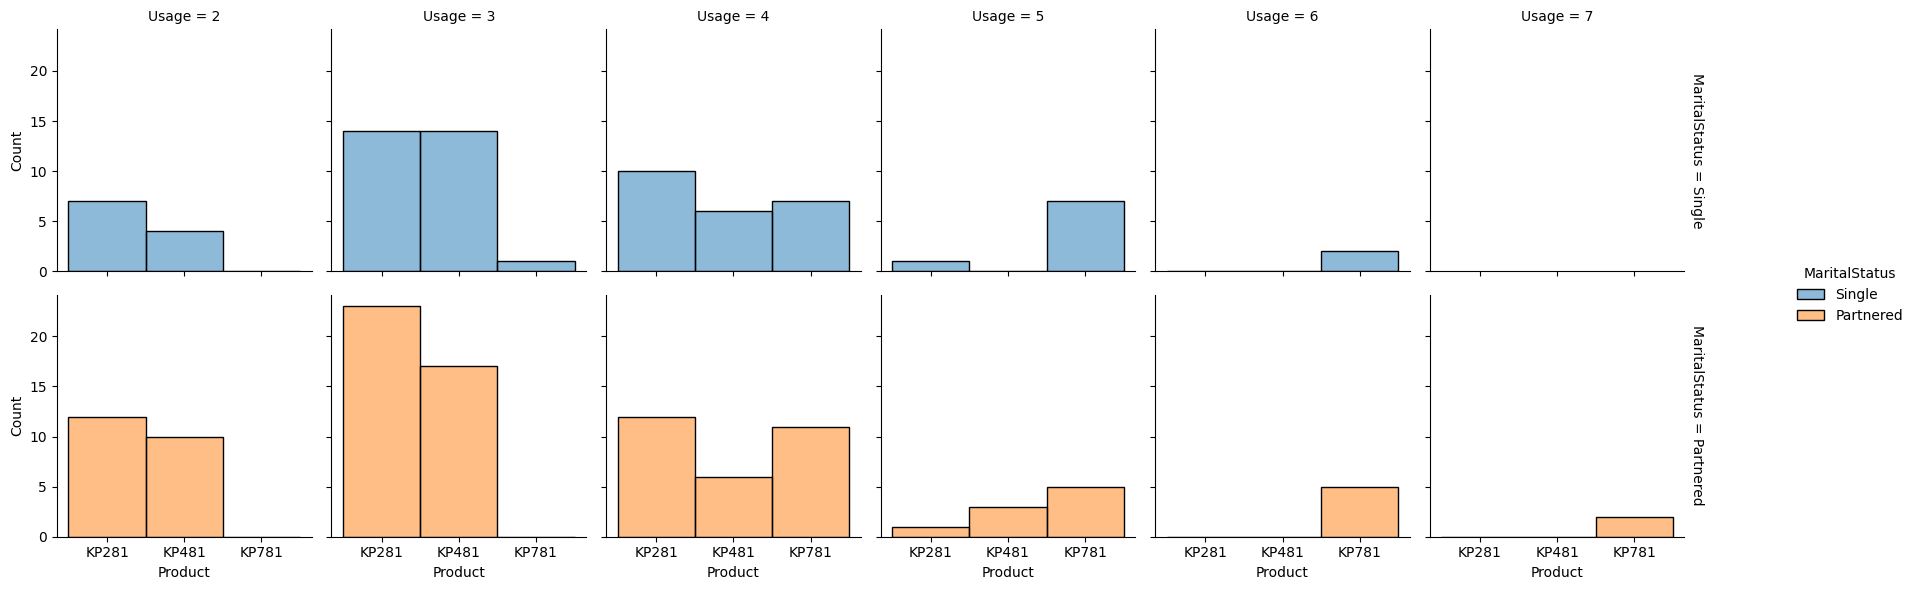

In [ ]:
#Maritalstatus vs Usage Vs Product
sns.displot(data=df,x="Product",col="Usage",row="MaritalStatus",hue="MaritalStatus",height=3,kind="hist",facet_kws=dict(margin_titles=True))

<Axes: xlabel='Count', ylabel='Income'>

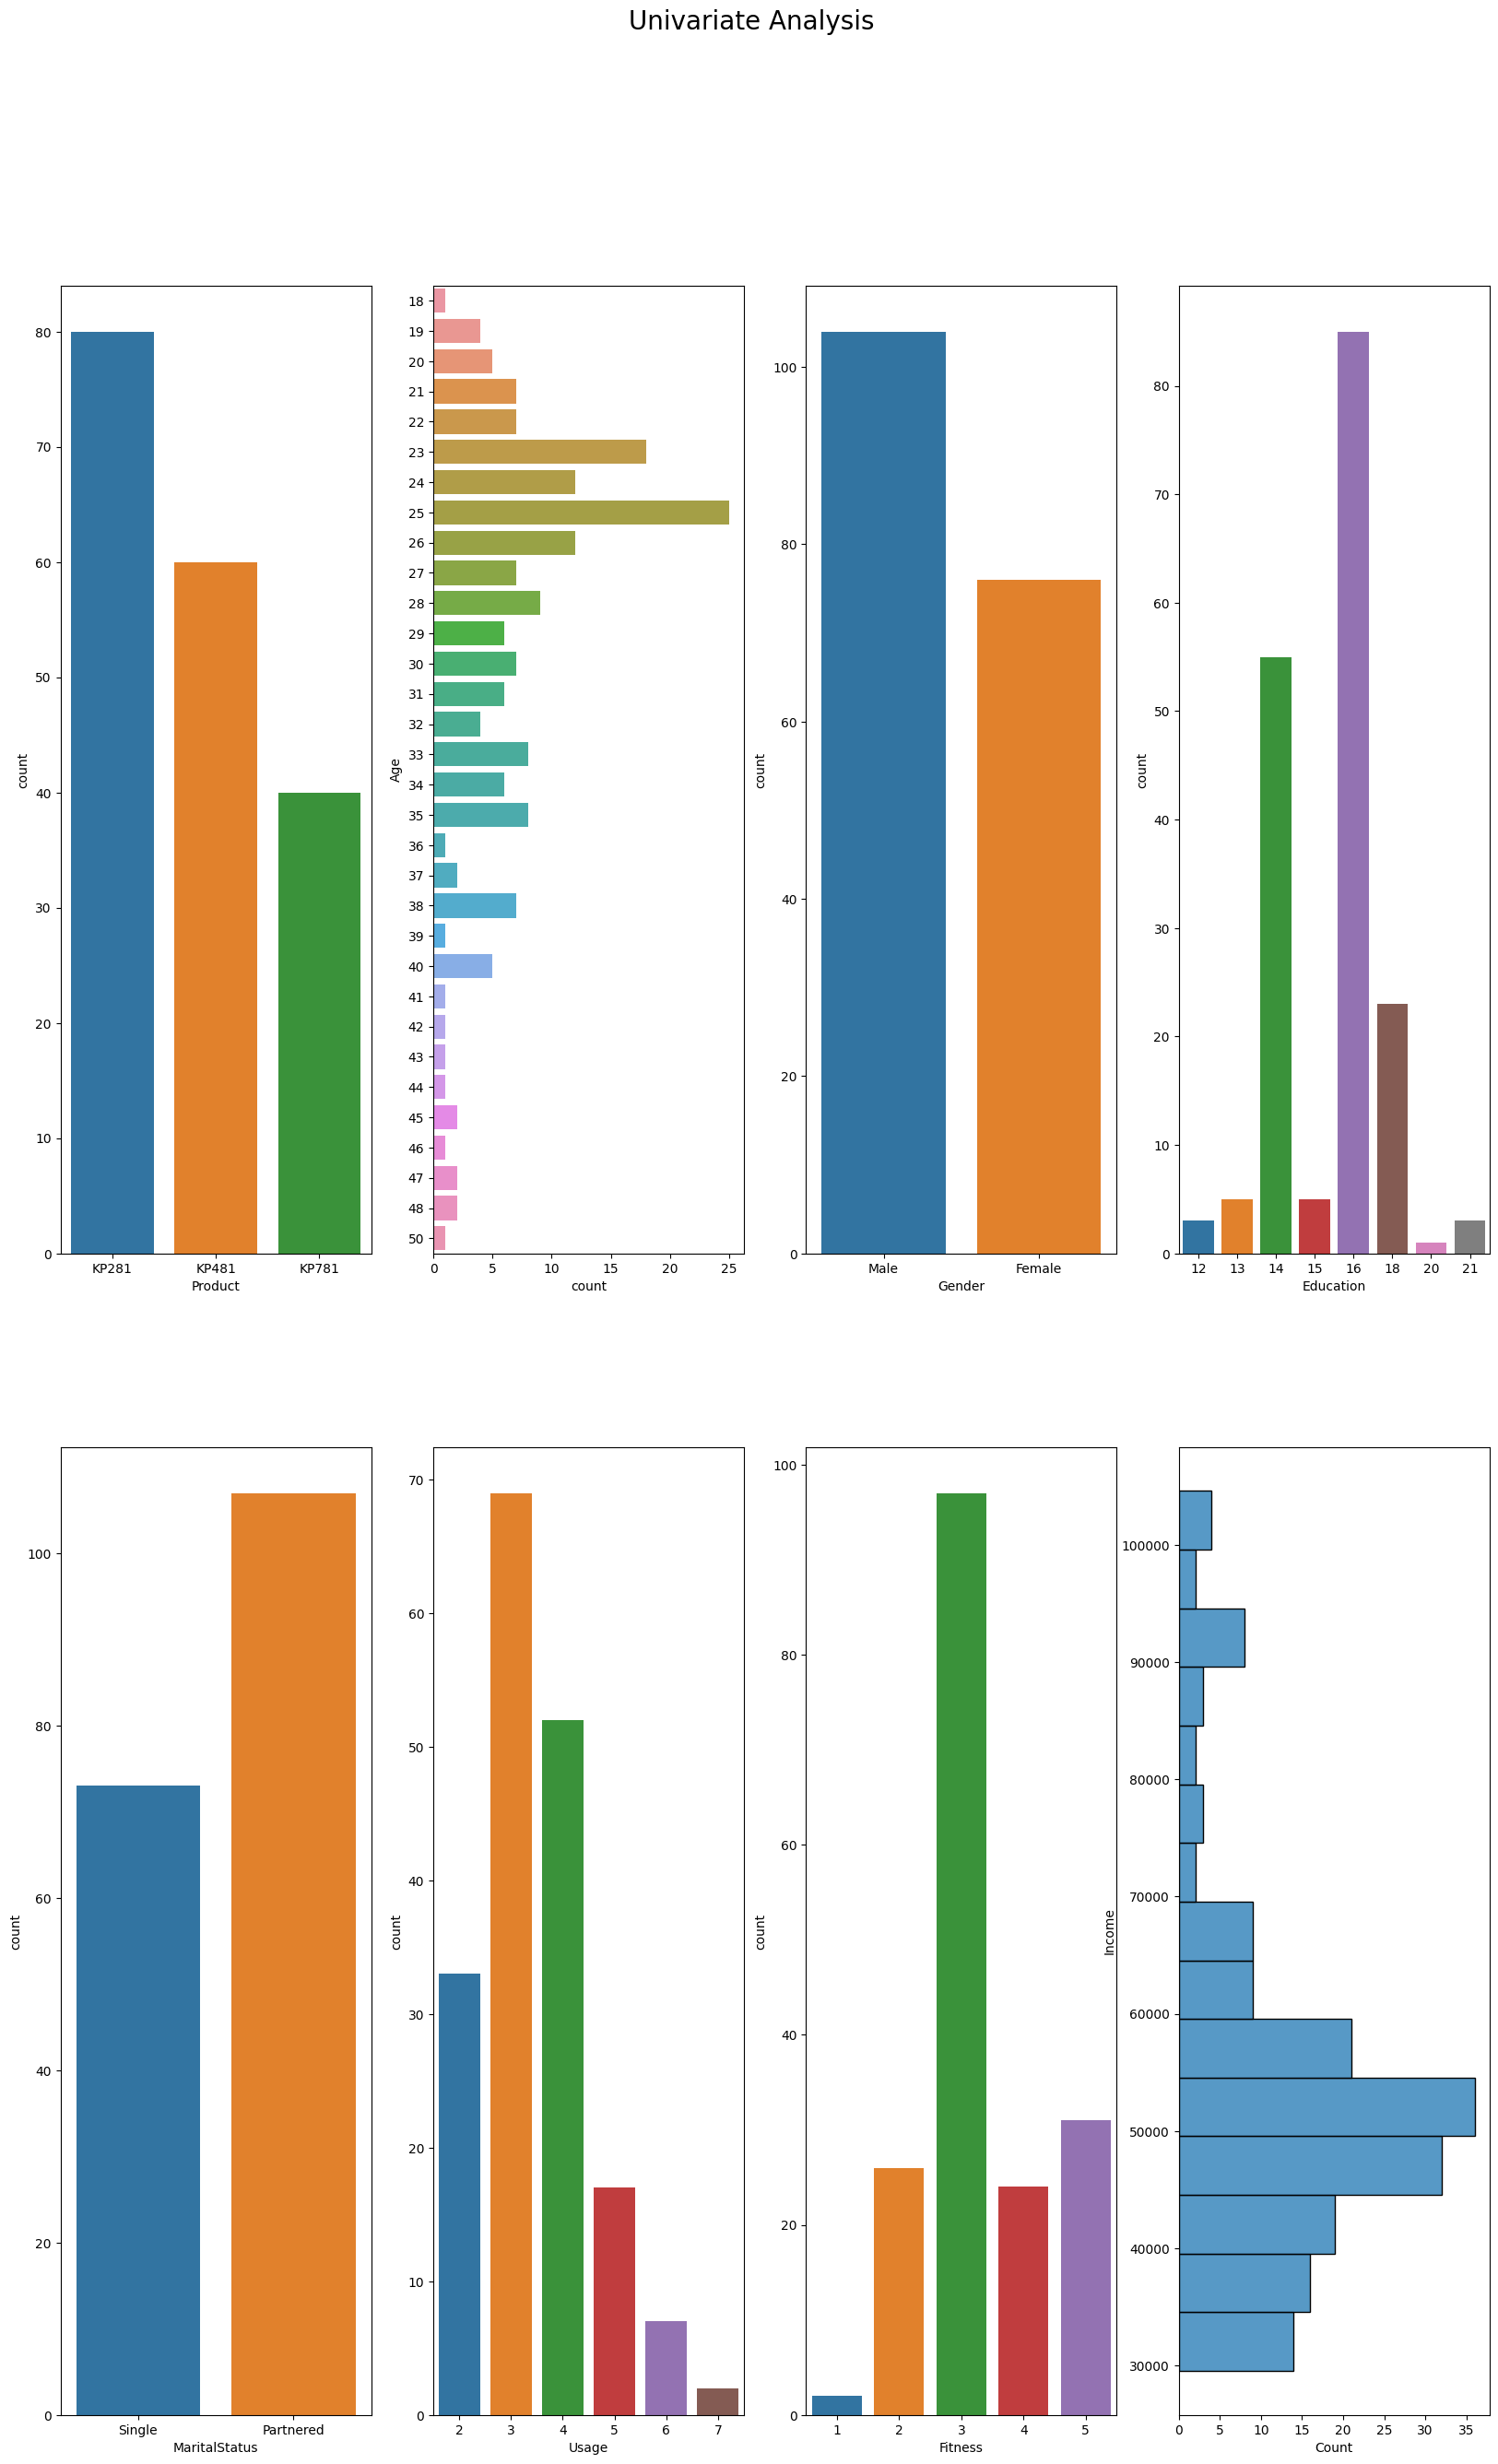

In [ ]:
plt.figure(figsize=(20,30))
plt.suptitle("Univariate Analysis",fontsize=20)

#Product Count
plt.subplot(2,4,1)
sns.countplot(data=df,x="Product",width=0.8)

#Age Count
plt.subplot(2,4,2)
sns.countplot(data=df,y="Age",width=0.8)

#Gender Count
plt.subplot(2,4,3)
sns.countplot(data=df,x="Gender",width=0.8)

#Education Count
plt.subplot(2,4,4)
sns.countplot(data=df,x="Education",width=0.8)

#MaritalStatus Count
plt.subplot(2,4,5)
sns.countplot(data=df,x="MaritalStatus",width=0.8)

#Usage Count
plt.subplot(2,4,6)
sns.countplot(data=df,x="Usage",width=0.8)

#Fitness Count
plt.subplot(2,4,7)
sns.countplot(data=df,x="Fitness",width=0.8)

#Income Count
plt.subplot(2,4,8)
sns.histplot(data=df,y="Income")


<Axes: xlabel='Count', ylabel='Income'>

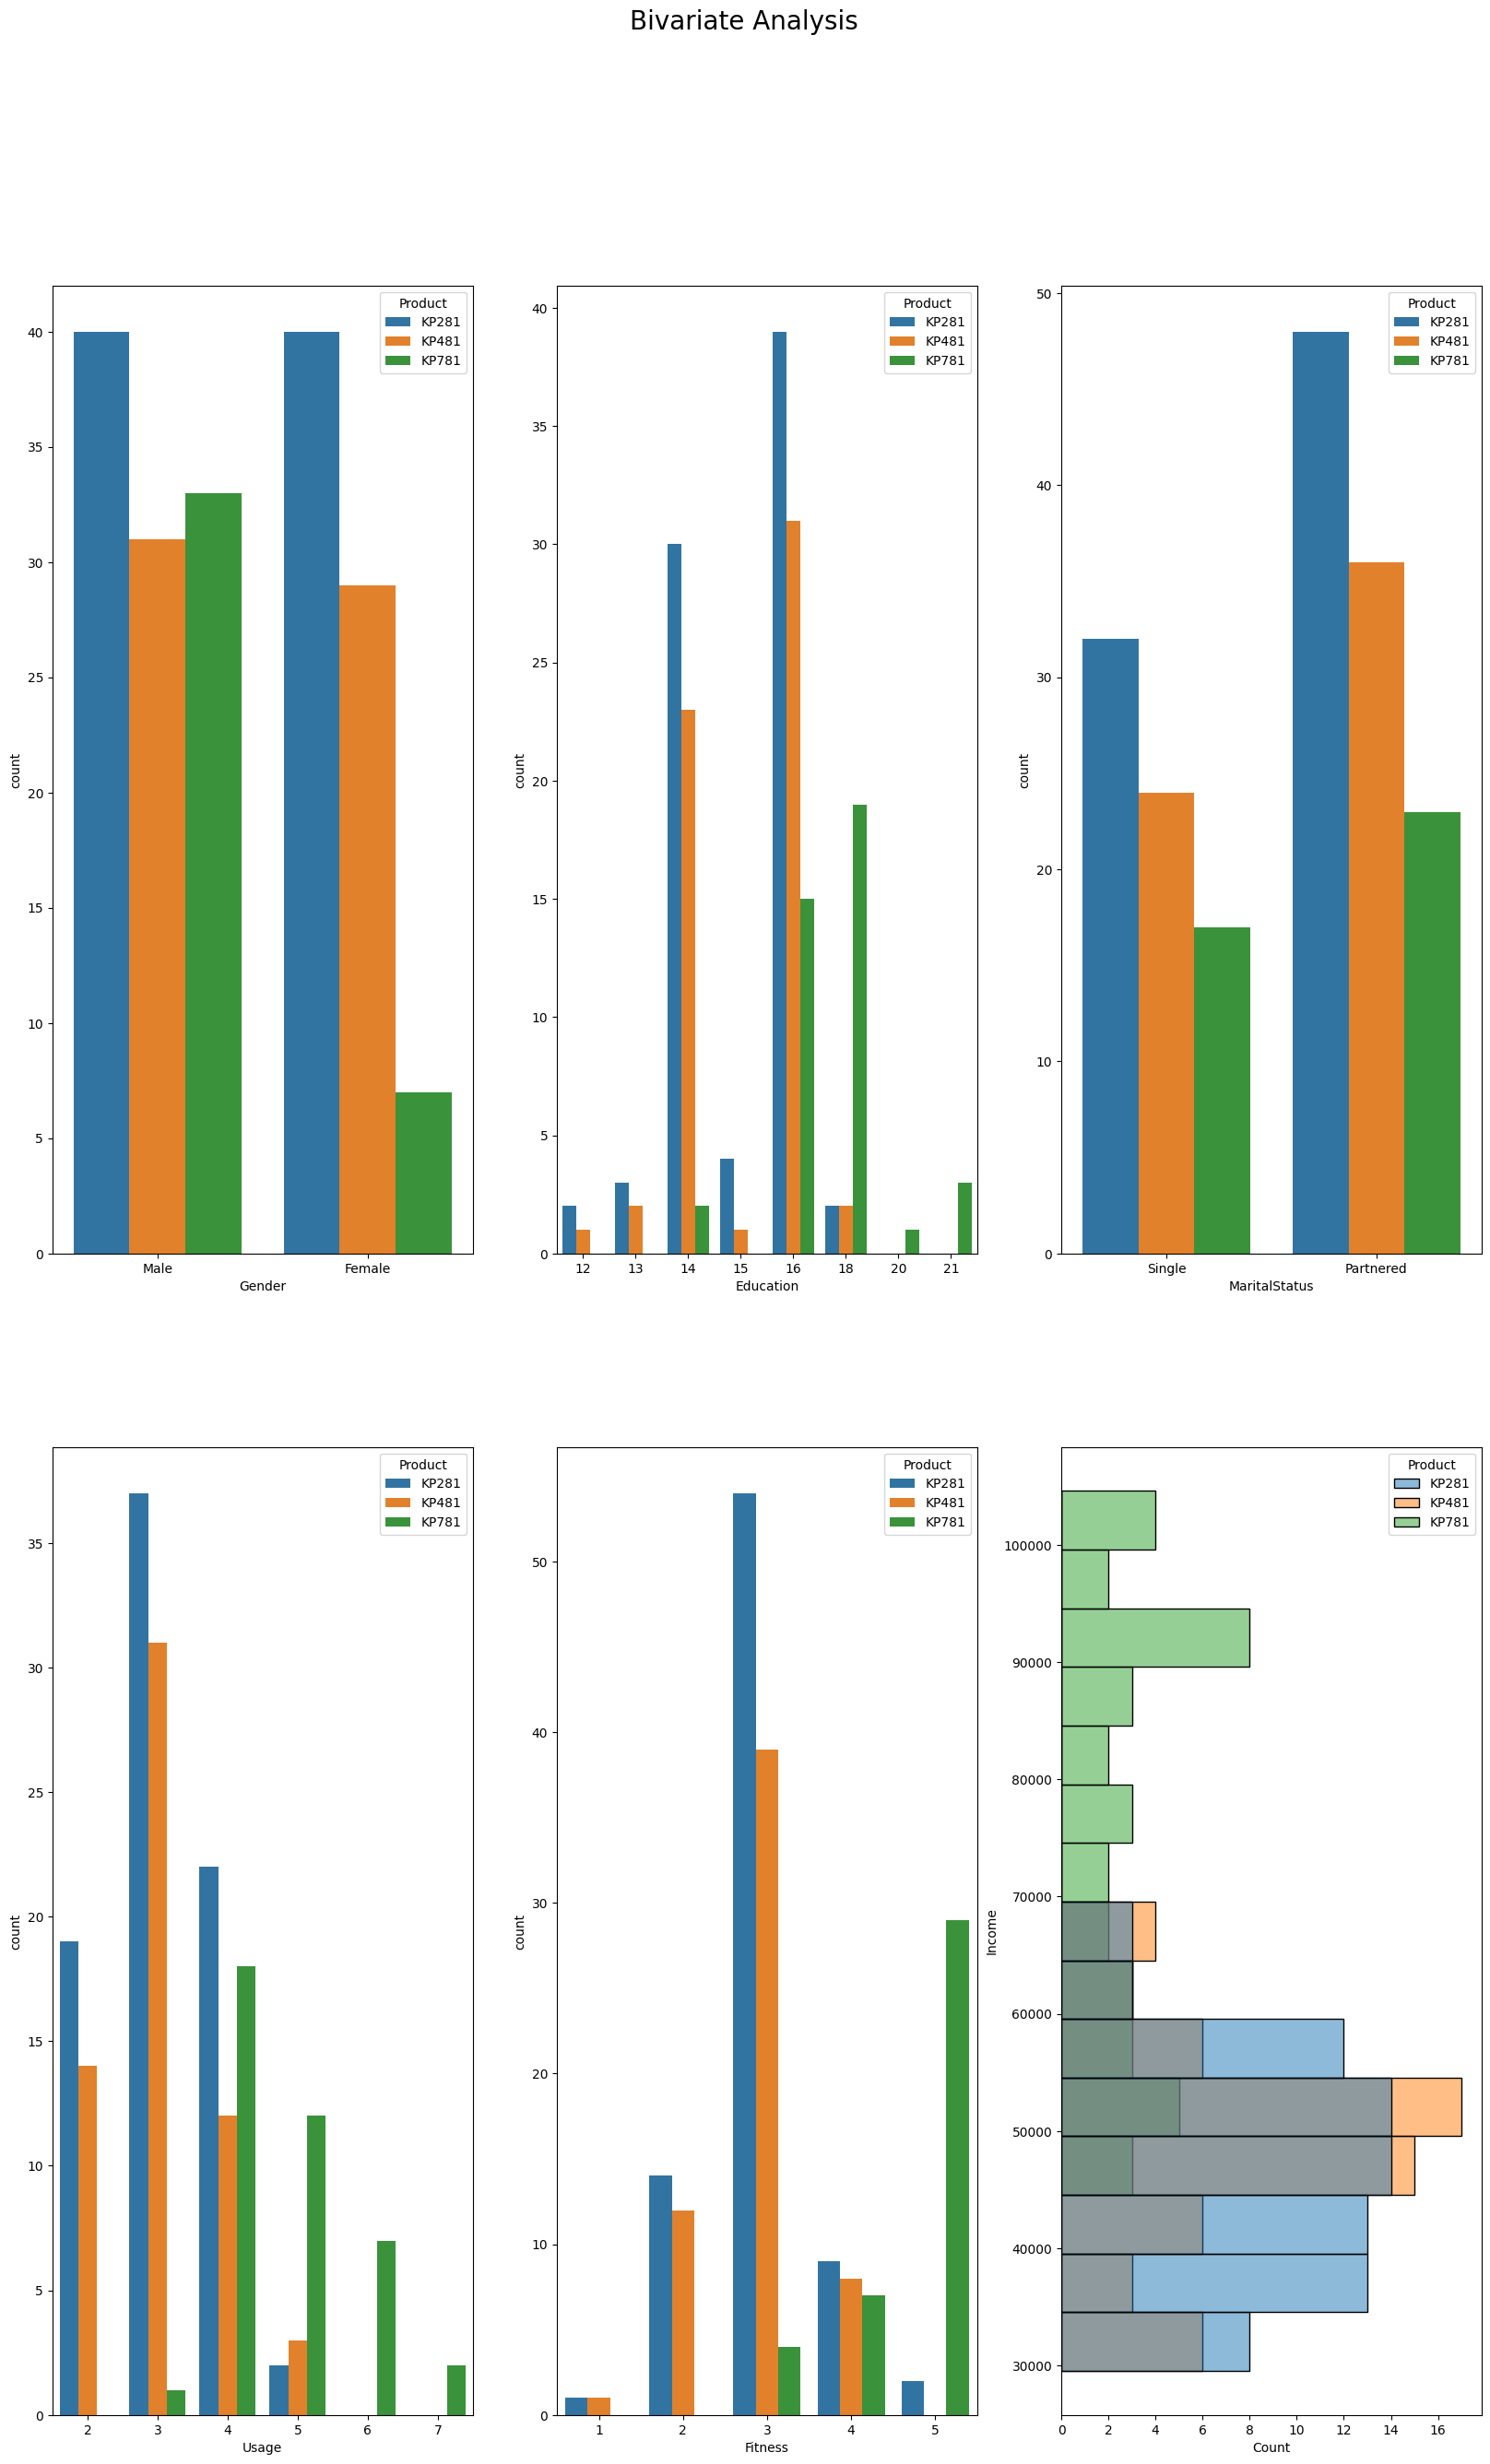

In [ ]:
#bivariate Analysis
plt.figure(figsize=(20,30))
plt.suptitle("Bivariate Analysis",fontsize=20)


#Gender Count
plt.subplot(2,3,1)
sns.countplot(data=df,x="Gender",hue="Product")

#Education Count
plt.subplot(2,3,2)
sns.countplot(data=df,x="Education",hue="Product")

#MaritalStatus Count
plt.subplot(2,3,3)
sns.countplot(data=df,x="MaritalStatus",hue="Product")

#Usage Count
plt.subplot(2,3,4)
sns.countplot(data=df,x="Usage",width=0.8,hue="Product")

#Fitness Count
plt.subplot(2,3,5)
sns.countplot(data=df,x="Fitness",width=0.8,hue="Product")

#Income Count
plt.subplot(2,3,6)
sns.histplot(data=df,y="Income",hue="Product")

Text(0.5, 1.0, 'Product vs Miles vs Gender')

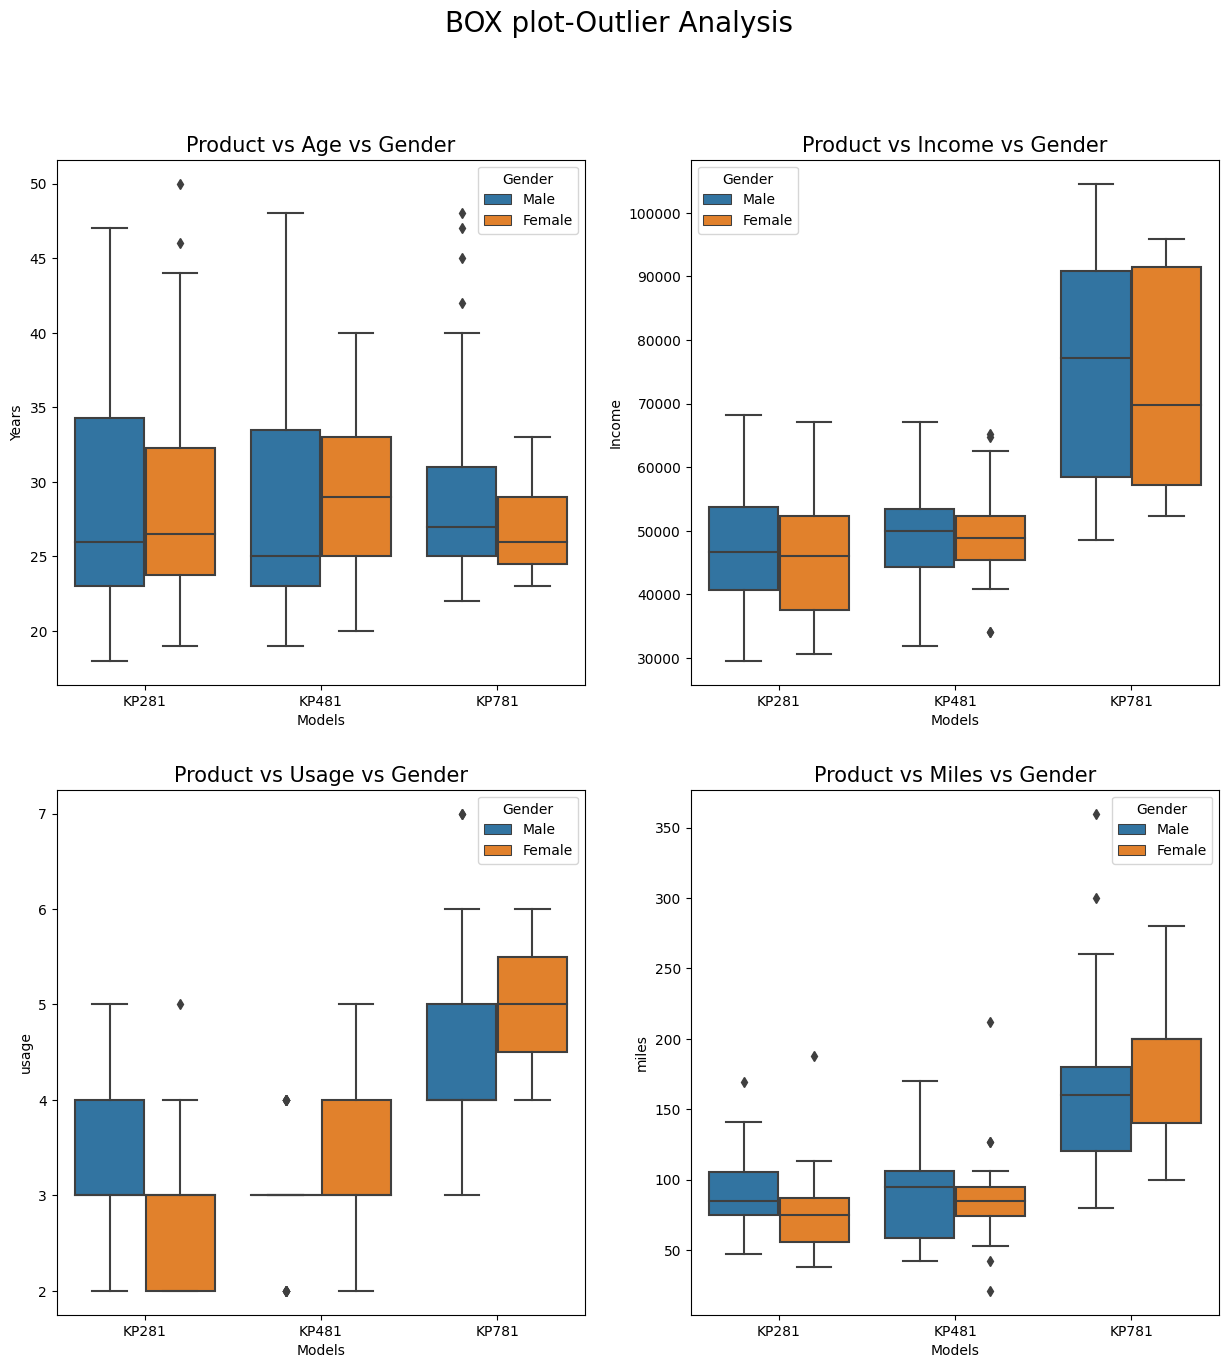

In [ ]:
#box Plot - outlier Anlaysis

plt.figure(figsize=(15,15))
plt.suptitle("BOX plot-Outlier Analysis",fontsize=20)

plt.subplot(2,2,1)
sns.boxplot(data=df,x="Product",y="Age",hue="Gender")
plt.xlabel("Models")
plt.ylabel("Years")
plt.title("Product vs Age vs Gender",fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(data=df,x="Product",y="Income",hue="Gender")
plt.xlabel("Models")
plt.ylabel("Income")
plt.title("Product vs Income vs Gender",fontsize=15)

plt.subplot(2,2,3)
sns.boxplot(data=df,x="Product",y="Usage",hue="Gender")
plt.xlabel("Models")
plt.ylabel("usage")
plt.title("Product vs Usage vs Gender",fontsize=15)

plt.subplot(2,2,4)
sns.boxplot(data=df,x="Product",y="Miles",hue="Gender")
plt.xlabel("Models")
plt.ylabel("miles")
plt.title("Product vs Miles vs Gender",fontsize=15)



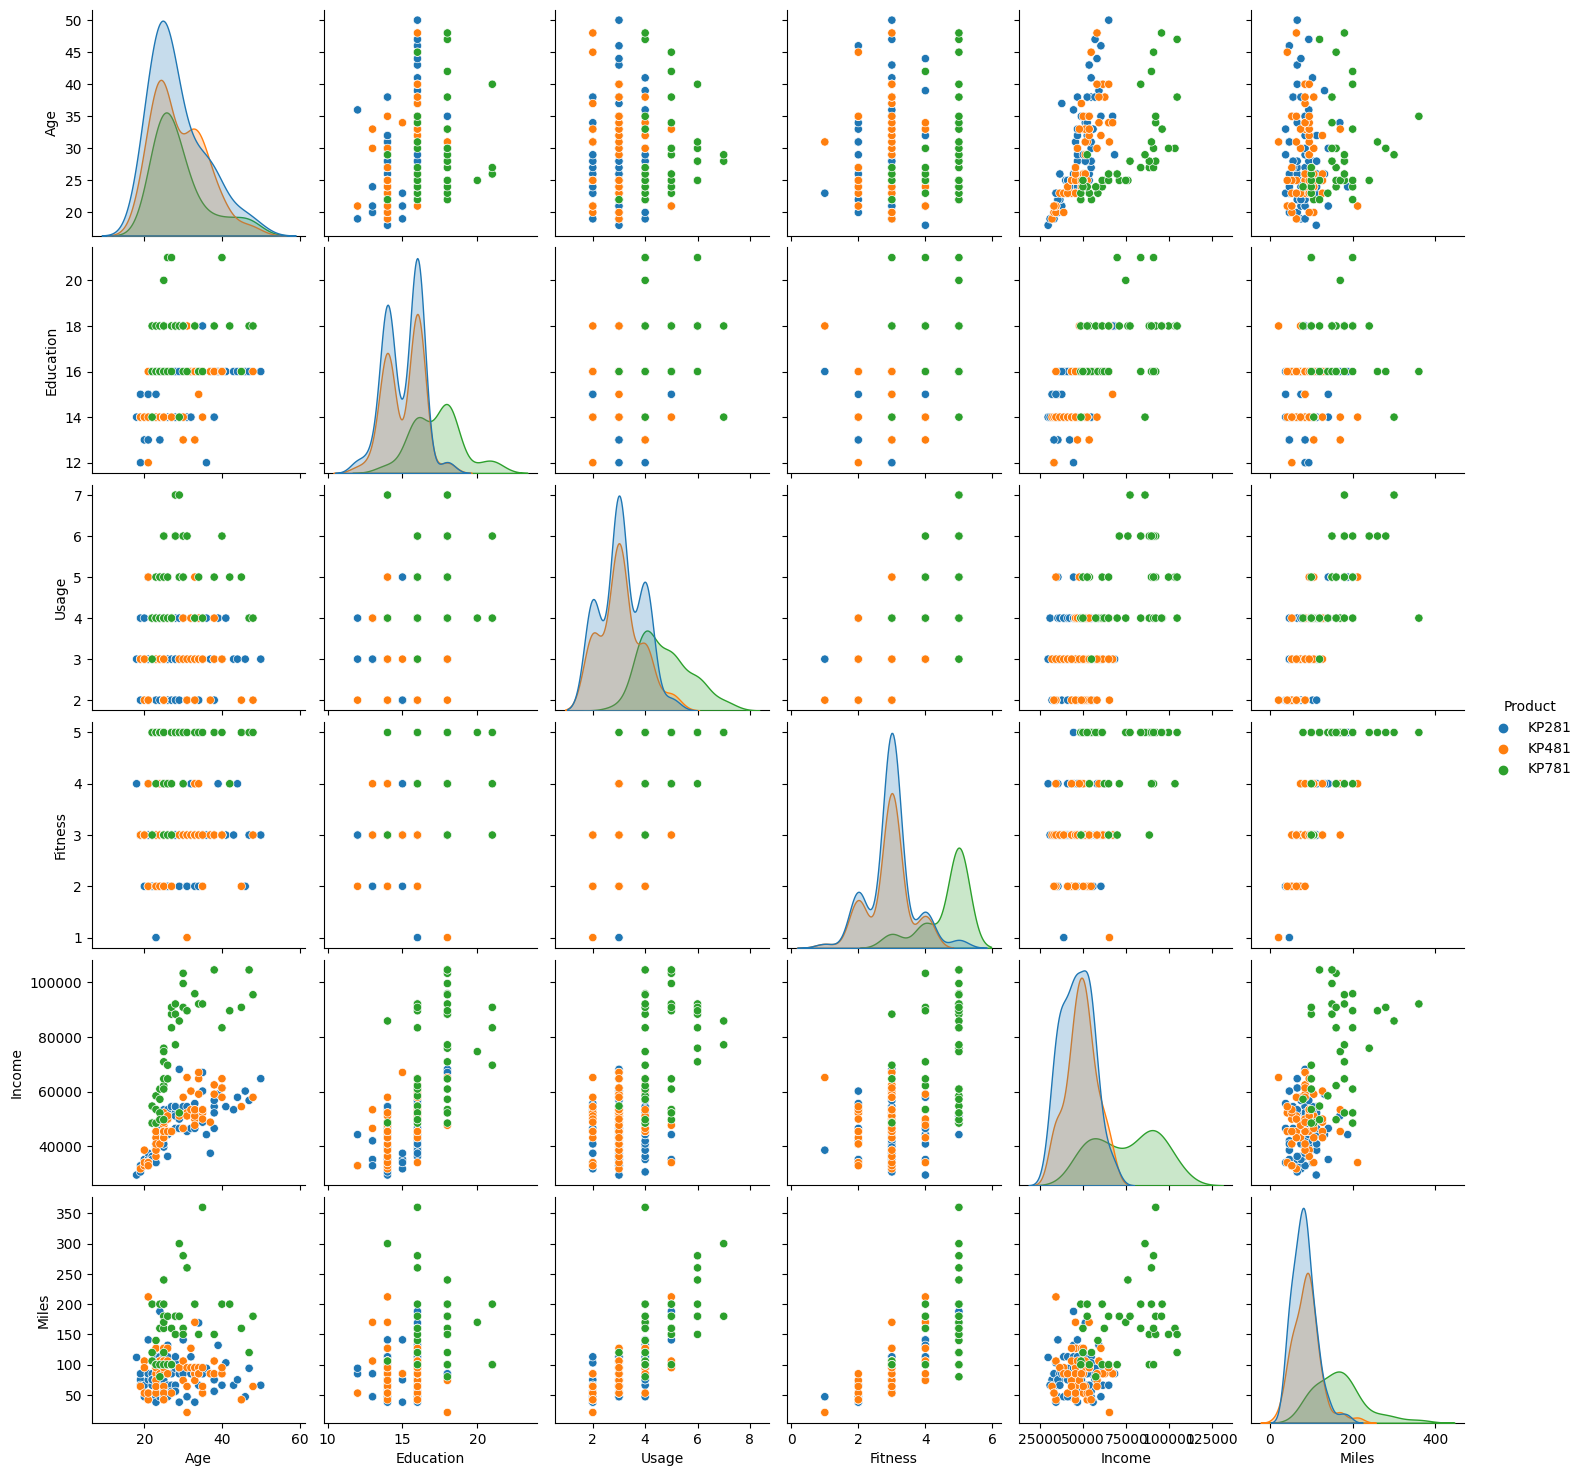

In [ ]:
#pairplot-products correlation with other variables
sns.pairplot(data=df,hue="Product")

<ipython-input-26-f9ebe8e057f2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap="crest")


<Axes: >

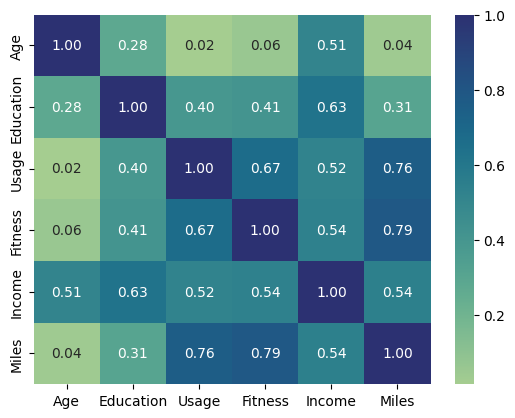

In [ ]:
#coorelation of one variable with other variables
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap="crest")

########## Insights ###############

* Age between 20-25 in both male and female category tend to buy the most treadmills, irrespective of the product
* In partners, Male tends to influence the most to buy treadmills in KP481,KP781
* Partners with higher usage tend to buy the KP781 the more

### Probabilty Analysis

In [ ]:
#Creating Age and income Bins
df_new=df
bins=[10,20,30,40,50,100]
labels=["10-20","20-30","30-40","40-50","50-100"]
df_new["Age_bins"]=pd.cut(df_new["Age"],bins=bins,labels=labels)
df_new

bins1=[0,35000,60000,200000]
label1=["Lower_Income","Mid_Income","High_Income"]
df_new["Income_bins"]=pd.cut(df_new["Income"],bins=bins1,labels=label1)
df_new

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Income_bins
0,KP281,18,Male,14,Single,3,4,29562,112,10-20,Lower_Income
1,KP281,19,Male,15,Single,2,3,31836,75,10-20,Lower_Income
2,KP281,19,Female,14,Partnered,4,3,30699,66,10-20,Lower_Income
3,KP281,19,Male,12,Single,3,3,32973,85,10-20,Lower_Income
4,KP281,20,Male,13,Partnered,4,2,35247,47,10-20,Mid_Income
...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,30-40,High_Income
176,KP781,42,Male,18,Single,5,4,89641,200,40-50,High_Income
177,KP781,45,Male,16,Single,5,5,90886,160,40-50,High_Income
178,KP781,47,Male,18,Partnered,4,5,104581,120,40-50,High_Income


In [ ]:
#Marginal Probability Fitness
MF=df_new["Fitness"].value_counts(normalize=True)*100
MF.reset_index().sort_values(["Fitness"],ascending=False).rename(columns={"index":"Fitness_Rating","Fitness":"Proportion"})

,Fitness_Rating,Proportion
0,3,53.888889
1,5,17.222222
2,2,14.444444
3,4,13.333333
4,1,1.111111


In [ ]:
#Marginal Probability usage
MU=df_new["Usage"].value_counts(normalize=True)*100
MU.reset_index().sort_values(["Usage"],ascending=False).rename(columns={"index":"No_of_usage","Usage":"Proportion"})

,No_of_usage,Proportion
0,3,38.333333
1,4,28.888889
2,2,18.333333
3,5,9.444444
4,6,3.888889
5,7,1.111111


In [ ]:
#Marginal Probability education
ME=df_new["Education"].value_counts(normalize=True)*100
ME.reset_index().sort_values(["Education"],ascending=False).rename(columns={"index":"Years_of_Education","Education":"Proportion"})

,Years_of_Education,Proportion
0,16,47.222222
1,14,30.555556
2,18,12.777778
3,15,2.777778
4,13,2.777778
5,12,1.666667
6,21,1.666667
7,20,0.555556


In [ ]:
#Marginal Probability income_bins
MI=df_new["Income_bins"].value_counts(normalize=True)*100
MI.reset_index().sort_values(["Income_bins"],ascending=False).rename(columns={"index":"Income_Bins","Income_bins":"Proportion"})

,Income_Bins,Proportion
0,Mid_Income,68.888889
1,High_Income,23.333333
2,Lower_Income,7.777778


In [ ]:
#Marginal Probability age_bins
MA=df_new["Age_bins"].value_counts(normalize=True)*100
MA.reset_index().sort_values(["Age_bins"],ascending=False).rename(columns={"index":"Age_Bins","Age_bins":"Proportion"})

,Age_Bins,Proportion
0,20-30,61.111111
1,30-40,26.666667
2,40-50,6.666667
3,10-20,5.555556
4,50-100,0.000000


In [ ]:
#Conditional probability - Product vs gender
Cpg=pd.crosstab(df_new["Product"],df_new["Gender"],margins=True,margins_name="Total_sales",normalize=True)*100
Cpg.round(1).reset_index()

Gender,Product,Female,Male,Total_sales
0,KP281,22.2,22.2,44.4
1,KP481,16.1,17.2,33.3
2,KP781,3.9,18.3,22.2
3,Total_sales,42.2,57.8,100.0


In [ ]:
#Conditional probability - Product vs MaritalStatus
Cpm=pd.crosstab(df_new["Product"],df_new["MaritalStatus"],margins=True,margins_name="Total_sales",normalize=True)*100
Cpm.round(1).reset_index()

MaritalStatus,Product,Partnered,Single,Total_sales
0,KP281,26.7,17.8,44.4
1,KP481,20.0,13.3,33.3
2,KP781,12.8,9.4,22.2
3,Total_sales,59.4,40.6,100.0


In [ ]:
#Conditional probability - Product vs Usage
Cpu=pd.crosstab(df_new["Product"],df_new["Usage"],margins=True,margins_name="Total_Usage",normalize=True)*100
Cpu.round(1).reset_index()

Usage,Product,2,3,4,5,6,7,Total_Usage
0,KP281,10.6,20.6,12.2,1.1,0.0,0.0,44.4
1,KP481,7.8,17.2,6.7,1.7,0.0,0.0,33.3
2,KP781,0.0,0.6,10.0,6.7,3.9,1.1,22.2
3,Total_Usage,18.3,38.3,28.9,9.4,3.9,1.1,100.0


In [ ]:
#Conditional probability - Product vs Fitness
Cpf=pd.crosstab(df_new["Product"],df_new["Fitness"],margins=True,margins_name="Proportion",normalize=True)*100
Cpf.round(1).reset_index()

Fitness,Product,1,2,3,4,5,Proportion
0,KP281,0.6,7.8,30.0,5.0,1.1,44.4
1,KP481,0.6,6.7,21.7,4.4,0.0,33.3
2,KP781,0.0,0.0,2.2,3.9,16.1,22.2
3,Proportion,1.1,14.4,53.9,13.3,17.2,100.0


In [ ]:
#Conditional probability - Product vs Education
Cpe=pd.crosstab(df_new["Product"],df_new["Education"],margins=True,margins_name="Proportion",normalize=True)*100
Cpe.round(1).reset_index()

Education,Product,12,13,14,15,16,18,20,21,Proportion
0,KP281,1.1,1.7,16.7,2.2,21.7,1.1,0.0,0.0,44.4
1,KP481,0.6,1.1,12.8,0.6,17.2,1.1,0.0,0.0,33.3
2,KP781,0.0,0.0,1.1,0.0,8.3,10.6,0.6,1.7,22.2
3,Proportion,1.7,2.8,30.6,2.8,47.2,12.8,0.6,1.7,100.0


In [ ]:
#Conditional probability - Product vs Income_bins
Cpi=pd.crosstab(df_new["Product"],df_new["Income_bins"],margins=True,margins_name="Proportion",normalize=True)*100
Cpi.round(1).reset_index()

Income_bins,Product,Lower_Income,Mid_Income,High_Income,Proportion
0,KP281,4.4,36.7,3.3,44.4
1,KP481,3.3,26.1,3.9,33.3
2,KP781,0.0,6.1,16.1,22.2
3,Proportion,7.8,68.9,23.3,100.0


In [ ]:
#Conditional probability - Product vs Age_bins
Cp_a=pd.crosstab(df_new["Product"],df_new["Age_bins"],margins=True,margins_name="Proportion",normalize=True)*100
Cp_a.round(1).reset_index()

Age_bins,Product,10-20,20-30,30-40,40-50,Proportion
0,KP281,3.3,27.2,10.6,3.3,44.4
1,KP481,2.2,17.2,12.8,1.1,33.3
2,KP781,0.0,16.7,3.3,2.2,22.2
3,Proportion,5.6,61.1,26.7,6.7,100.0


########## Insights ###############

* Among the buyers,54% rated themselves at level 3 fitness
* age group between 20-40 constitutes about 87% of the sales
* KP781 product is most bought by males compared to females

### Summary

* KP281 and KP481 are the most bought product which have similar characteristic,which are preffered by income of lower and mid level.since the usage is also less among these products, it is bought by beginners who want to improve their fitness level in both male and female

* KP781 is mostly bought by people who have high level of income,higher years of education and with higher usage rate. this premium product is well distinguished among the customers who have higher inclination towards the fitness

* Aerofit needs to distinguish the features of KP281,KP481 and target the beginners to upgrade to buy KP481 by bettter reach to customers by better sales and marketing strategies